**Reliance Industries Limited Stock Prediction**

***Time Series Analysis Model***

***Raj Kumar Beniwal***

In [ ]:
#import basic libraries and modules
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 13.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=d5ba17bcecf2280eeb32fcc36f3de28e0035f96fb9b893b018e1e54633816b4b
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=a17ff646c92b4eb6b6d0954daa1b5b0209fa3287af5712c12596be3c3b2f35ad
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [ ]:
#reading historic data using yfinance
from datetime import date
import yfinance as yf
from yahoofinancials import YahooFinancials
reliance_df = yf.download('RELIANCE.NS', 
                      start='2015-01-01', 
                      end= date.today() , 
                      progress=False)
print(reliance_df.head())
print(reliance_df.tail())

                  Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2015-01-01  443.149994  446.000000  441.825012  443.950012  415.367096  1354878
2015-01-02  444.049988  448.024994  442.149994  442.774994  414.267700  3351654
2015-01-05  442.500000  445.450012  437.049988  437.924988  409.729980  4619182
2015-01-06  435.000000  436.500000  416.000000  418.049988  391.134613  8516086
2015-01-07  418.549988  429.399994  418.500000  427.149994  399.648712  9472630
                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2020-11-13  1982.000000  2036.650024  ...  1996.400024  20946864
2020-11-17  2085.000000  2085.000000  ...  1993.250000  21479385
2020-11-18  1993.250000  2006.500000  ...  1987.199951  14030652
2020-11-19  1987.199951  2010.449951  ...  1973.150024  12828008
2020-11-20  1975.000000  1983.800049  ...  1899.50

In [ ]:
print("Dimensions of data: ", reliance_df.shape)
print("Statistical summary of the data: \n", reliance_df.describe())

Dimensions of data:  (1451, 6)
Statistical summary of the data: 
               Open         High  ...    Adj Close        Volume
count  1451.000000  1451.000000  ...  1451.000000  1.451000e+03
mean    951.411978   962.765338  ...   938.031994  9.570142e+06
std     477.246445   483.505714  ...   481.103166  7.206009e+06
min     408.299988   408.850006  ...   379.275635  1.283997e+06
25%     507.600006   512.500000  ...   491.650116  5.431160e+06
50%     913.000000   921.799988  ...   897.603516  7.329126e+06
75%    1266.525024  1279.300049  ...  1254.606079  1.087900e+07
max    2325.000000  2369.350098  ...  2324.550049  6.523004e+07

[8 rows x 6 columns]


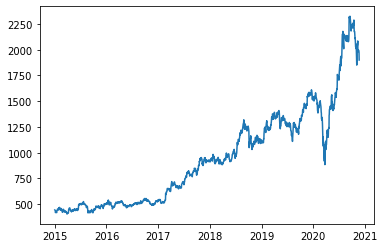

In [ ]:
plt.plot(reliance_df['Close'])
plt.show()

In [ ]:
#i am gonna predict the stock closing value 
reliance_df = reliance_df.reset_index()
df = reliance_df[["Date","Close"]]
df.head()

,Date,Close
0,2015-01-01,443.950012
1,2015-01-02,442.774994
2,2015-01-05,437.924988
3,2015-01-06,418.049988
4,2015-01-07,427.149994


In [ ]:
#lets split the data
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
print("shape: \n", train_data.shape, test_data.shape)

shape: 
 (1160, 2) (291, 2)


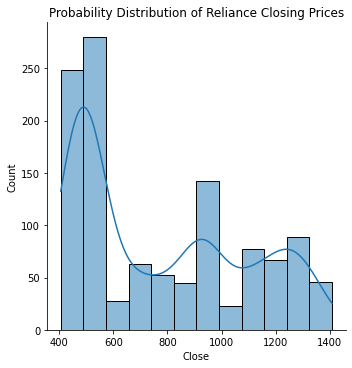

In [ ]:
#probability distribution of reliance prices
sn.displot(train_data['Close'], kde=True)
plt.title("Probability Distribution of Reliance Closing Prices")
plt.show()

In [ ]:
#Aim of this project was to learn different time series models and implement them
# so here we go!!

Text(0, 0.5, 'Stock Price')

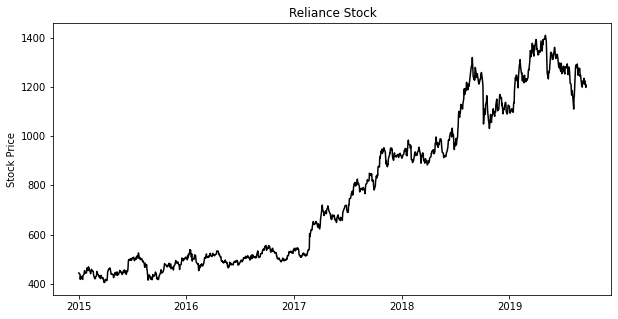

In [ ]:
#Stationary check
train_data = train_data.set_index('Date', drop = False)
plt.figure(figsize=(10, 5))
plt.plot(train_data['Close'], color='black')
plt.title("Reliance Stock")
plt.ylabel("Stock Price")

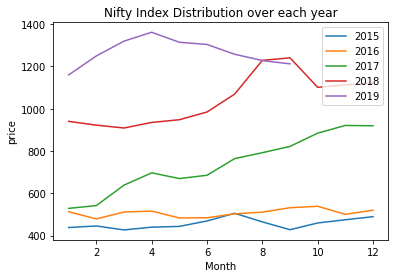

In [ ]:
season = train_data
season['Date'] = train_data.Date
season['Year'] = train_data['Date'].dt.year
season['Month'] = train_data['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Close')
spivot.plot()
plt.legend(loc = 'upper right')
plt.ylabel('price')
plt.title('Reliance Distribution over each year')
plt.show()

In [ ]:
#conducting dicky fuller test for seasonality
from statsmodels.tsa.stattools import adfuller
def test(data):
  sd = adfuller(data)
  print('Test Statistic: ', sd[0])
  print("Critical Values: ", sd[4])
  print("p-value: ", sd[1])
test(train_data['Close'])

Test Statistic:  -0.2091195918604463
Critical Values:  {'1%': -3.436089106551049, '5%': -2.864074184091338, '10%': -2.568119264202968}
p-value:  0.9374258202439208


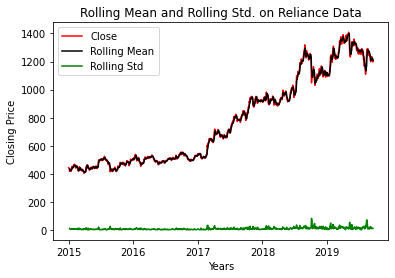

In [ ]:
#rolling statistics
def rs(data):
  mean = data.rolling(4).mean()
  std = data.rolling(4).std()
  close = plt.plot(data, color='red',label='Close')
  mean = plt.plot(mean, color='black', label='Rolling Mean')
  std = plt.plot(std, color='green', label = 'Rolling Std')
  plt.xlabel("Years")
  plt.ylabel("Closing Price")
  plt.title('Rolling Mean and Rolling Std. on Reliance Data')
  plt.legend()
  plt.show()
rs(train_data['Close'])

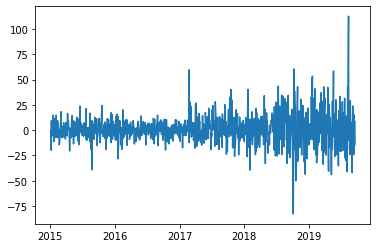

In [ ]:
#using differencing to remove stationarity\
close_1 = train_data['Close'] - train_data['Close'].shift(1)
plt.plot(close_1)
plt.show()

Test Statistic:  -10.046867004629705
Critical Values:  {'1%': -3.436089106551049, '5%': -2.864074184091338, '10%': -2.568119264202968}
p-value:  1.4466963260194143e-17


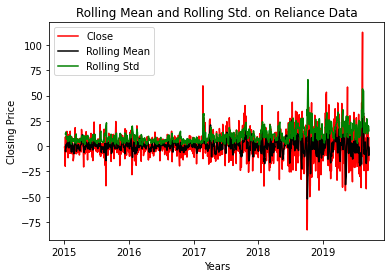

In [ ]:
#lets onduct adfuller test for diffferencing
close_1 = close_1.dropna()
test(close_1)
rs(close_1)

In [ ]:
#Arima model
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
acf_ = acf(close_1, nlags=25)
pacf_ = pacf(close_1, nlags=25, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

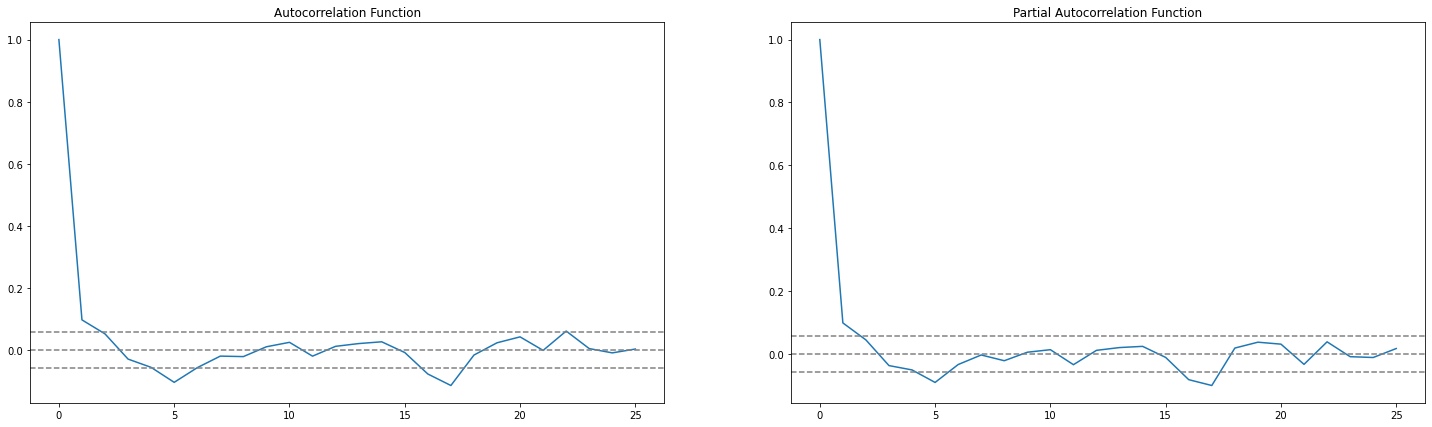

In [ ]:
plt.figure(figsize=(25,7))
#Plot ACF and PACF
plt.subplot(121) 
plt.plot(acf_)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(close_1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(close_1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf_)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(close_1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(close_1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

To build ARiMA Model we need:

p- PACF lag value where it crosses the upper confidence interval i.e. 2

q- ACF lag value where it crosses the upper confidence interval i.e. 2  

d- differencing value i.e. 1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train_data['Close'], order = (2,1,2))
results = model.fit(disp = -1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Residual Sum of Squares: 212338.827883


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [ ]:
print(results.summary())
print('Residual Sum of Squares: %2f'% sum((results.fittedvalues - close_1)**2))

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1159
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4665.455
Method:                       css-mle   S.D. of innovations             13.513
Date:                Sun, 22 Nov 2020   AIC                           9342.910
Time:                        15:12:05   BIC                           9373.242
Sample:                             1   HQIC                          9354.356
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6650      0.420      1.582      0.114      -0.159       1.489
ar.L1.D.Close     0.9924      0.009    105.721      0.000       0.974       1.011
ar.L2.D.Close    -0.9576      0.009   -1

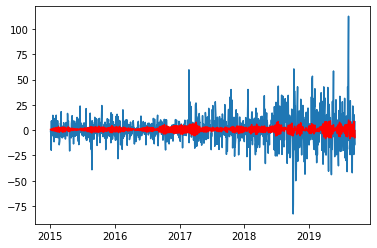

In [ ]:
plt.plot(close_1)
plt.plot(results.fittedvalues, color='red')
plt.show()

In [ ]:
#predict the terain data
predict_train = results.predict(1,1160)
predict_train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0    0.665006
1    0.600247
2    0.413246
3   -0.225571
4    0.264522
dtype: float64

In [ ]:
predict_train_cumsum = predict_train.cumsum() + train_data['Close'][0]
print(predict_train_cumsum.head())
print(predict_train_cumsum.tail())

0    444.615018
1    445.215265
2    445.628512
3    445.402941
4    445.667463
dtype: float64
1155    1222.465717
1156    1215.218443
1157    1207.480727
1158    1206.988123
1159    1214.443213
dtype: float64


In [ ]:
train_data['ARIMA_predict'] = predict_train_cumsum.values

In [ ]:
#evaluating the training model
from math import sqrt
from sklearn.metrics import mean_squared_error
print("RMSE for training dataset is: \n", np.sqrt(mean_squared_error(train_data['Close'], train_data['ARIMA_predict'])))

RMSE for training dataset is: 
 125.92702962768581


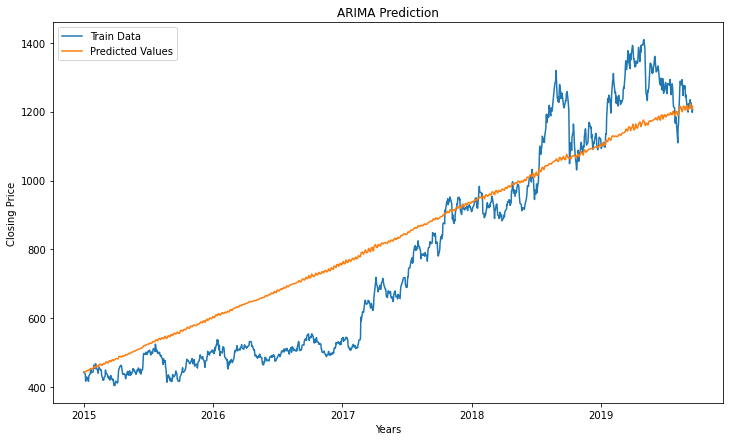

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(train_data['Close'], label = 'Train Data')
plt.plot(train_data['ARIMA_predict'], label = 'Predicted Values')
plt.title('ARIMA Prediction')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.legend()

In [ ]:
#ARIMA forecasting
len(train_data), len(test_data)

(1160, 291)

In [ ]:
predict_test = results.predict(1160, 1160+290)
predict_test.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1159    7.455090
1160    8.882532
1161    2.317710
1162   -5.564036
1163   -7.099227
dtype: float64

In [ ]:
predict_test_cumsum = predict_test.cumsum() + train_data['Close'][-1]
print (predict_test_cumsum.head())
print (predict_test_cumsum.tail())

1159    1213.155041
1160    1222.037573
1161    1224.355283
1162    1218.791247
1163    1211.692020
dtype: float64
1445    1405.141817
1446    1405.796517
1447    1406.444205
1448    1407.101893
1449    1407.776221
dtype: float64


In [ ]:
test_data['ARIMA_predict'] = predict_test_cumsum.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print("RMSE for test dataset is: \n", np.sqrt(mean_squared_error(test_data['Close'], test_data['ARIMA_predict'])))

RMSE for test dataset is: 
 464.7178405691377


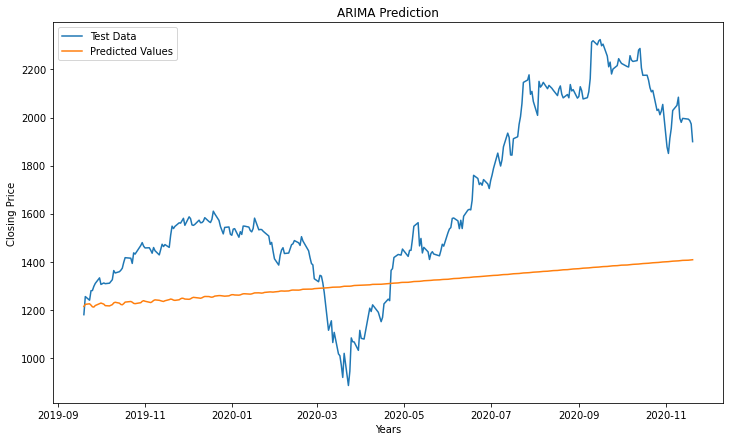

In [ ]:
test_data = test_data.set_index('Date')
plt.figure(figsize=(12,7))
plt.plot(test_data['Close'], label = 'Test Data')
plt.plot(test_data['ARIMA_predict'], label = 'Predicted Values')
plt.title('ARIMA Prediction')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.legend()

In [ ]:
#sarimax model
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(close_1, order=(2, 1, 2), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1159
Model:             SARIMAX(2, 1, 2)x(1, 1, 1, 12)   Log Likelihood               -4660.363
Date:                            Sun, 22 Nov 2020   AIC                           9334.725
Time:                                    15:58:40   BIC                           9370.033
Sample:                                         0   HQIC                          9348.056
                                           - 1159                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7744      0.119     -6.490      0.000      -1.008      -0.541
ar.L2          0.1140      0.019   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


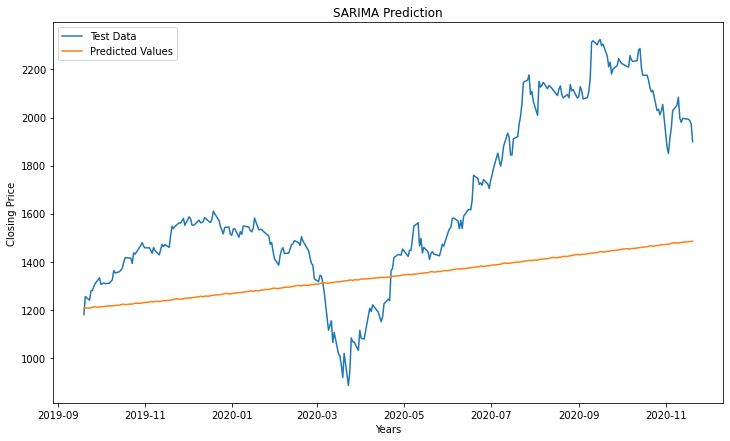

RMSE for test dataset is: 
 430.4797774788139


In [ ]:
predict_test = results.predict(1160, 1160+290)
predict_test_cumsum = predict_test.cumsum() + train_data['Close'][-1]
test_data['SARIMA_predict'] = predict_test_cumsum.values
plt.figure(figsize=(12,7))
plt.plot(test_data['Close'], label = 'Test Data')
plt.plot(test_data['SARIMA_predict'], label = 'Predicted Values')
plt.title('SARIMA Prediction')
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print("RMSE for test dataset is: \n", np.sqrt(mean_squared_error(test_data['Close'], test_data['SARIMA_predict'])))